## File information

File: Assignment_5.3.ipynb

Name: Amie Davis

Date: 1/7/2021

Course: DSC650 - Big Data

Assignment Number: 5.3

Purpose: Implement the housing price regression model found in section 3.6 of Deep Learning with Python.

# Predicting house prices: a regression example 

## This file contains code from Deep Learning with Python

www.manning.com/books/deep-learning-with-python

Copyright 2018 Francois Chollet

## Data Source: The Boston Housing Price dataset - comes packaged with Keras. 

In [2]:
import keras
keras.__version__

'2.3.1'

## Load the data

In [4]:
# Use Keras small dataset for Boston housing prices
# Note thay each feature is on different scale and will need to be normalized
# Targets are median values of homes, in thousands of dollars - continuous values
# Split data into training & test datasets 
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

57344/57026 [==============================] - 0s 1us/step


In [5]:
# Review training data
train_data.shape

(404, 13)

In [6]:
# Review test data
test_data.shape

(102, 13)

## Prepare the data

In [7]:
# Normalize data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Build Keras Neural Network Model

In [8]:
# Use a function to define and compile model
from keras import models
from keras import layers

def build_model():
    # Define the model:   
    # input_shape is size of data vector
    # 64 hidden layers
    # Use no activation fxn since scalar regression problem  (no range for output)
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    # Compile model:
    # Use Mean Squared Error (mse) for less fxn since regression problem
    # Use Mean Absolute Error (mae) as metric (difference between the predictions and the targets)
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## Validate Model

In [10]:
# Use K-fold Cross-Validation (since small dataset)

import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build & compile model
    model = build_model()
    
    # Train the model
    # Collect measurement logs
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [11]:
# Use average of MAE scores for all folds
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

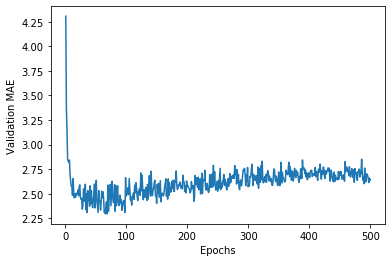

In [12]:
# Plot validation mae 
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

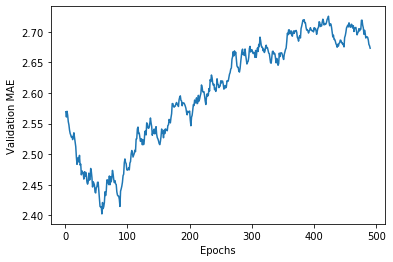

In [13]:
# To make plot easier to read:
# Omit the first 10 data points
# Smooth curve.

def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Re-Train & Evaluate Model

In [14]:
# Re-train model based on plot
# Mean Absolute Error (mae) gets higer at about 60 epochs
# Re-train with 60 epochs

model = build_model()

# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=60, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 412us/step


In [15]:
# Show Evaluation results (final error)
test_mae_score

2.728977680206299

Model is off by about \$2,730.